# Midterm
* Load Data
* Exploratory Analysis
* Initial Model
* Evaluation
* Feature Engineering
* Model 2
* Evaluation
* Further Investigation/Exploration

## Load Data
* Standard Package Imports
* Import Dataframe

In [2]:
#standard package imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./Datasets/NYC_Cab_Duration.csv')

In [4]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 12 columns):
Unnamed: 0            583458 non-null int64
id                    583458 non-null object
vendor_id             583458 non-null int64
pickup_datetime       583458 non-null object
dropoff_datetime      583458 non-null object
passenger_count       583458 non-null int64
pickup_longitude      583458 non-null float64
pickup_latitude       583458 non-null float64
dropoff_longitude     583458 non-null float64
dropoff_latitude      583458 non-null float64
store_and_fwd_flag    583458 non-null object
trip_duration         583458 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 53.4+ MB


## Exploratory Analysis
#### For Later
* Use pickup_datetime and dropoff_datetime, transform to days of the week
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
* Use Timeseries to perform data analysis
https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 12 columns):
Unnamed: 0            583458 non-null int64
id                    583458 non-null object
vendor_id             583458 non-null int64
pickup_datetime       583458 non-null object
dropoff_datetime      583458 non-null object
passenger_count       583458 non-null int64
pickup_longitude      583458 non-null float64
pickup_latitude       583458 non-null float64
dropoff_longitude     583458 non-null float64
dropoff_latitude      583458 non-null float64
store_and_fwd_flag    583458 non-null object
trip_duration         583458 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 53.4+ MB


In [7]:
#Converting trip_duration to minutes
df['trip_duration_minutes'] = df['trip_duration']/60

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_minutes'],
      dtype='object')

#### Use datetime methods to turn pickup_datetime and dropoff_datetime to days of the week

In [9]:
#df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
#pd.to_datetime(df.pickup_datetime).head()

In [10]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 13 columns):
Unnamed: 0               583458 non-null int64
id                       583458 non-null object
vendor_id                583458 non-null int64
pickup_datetime          583458 non-null datetime64[ns]
dropoff_datetime         583458 non-null object
passenger_count          583458 non-null int64
pickup_longitude         583458 non-null float64
pickup_latitude          583458 non-null float64
dropoff_longitude        583458 non-null float64
dropoff_latitude         583458 non-null float64
store_and_fwd_flag       583458 non-null object
trip_duration            583458 non-null int64
trip_duration_minutes    583458 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 57.9+ MB


In [13]:
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 13 columns):
Unnamed: 0               583458 non-null int64
id                       583458 non-null object
vendor_id                583458 non-null int64
pickup_datetime          583458 non-null datetime64[ns]
dropoff_datetime         583458 non-null datetime64[ns]
passenger_count          583458 non-null int64
pickup_longitude         583458 non-null float64
pickup_latitude          583458 non-null float64
dropoff_longitude        583458 non-null float64
dropoff_latitude         583458 non-null float64
store_and_fwd_flag       583458 non-null object
trip_duration            583458 non-null int64
trip_duration_minutes    583458 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(4), object(2)
memory usage: 57.9+ MB


In [15]:
df.pickup_datetime.dt.day_name().head()

0     Thursday
1    Wednesday
2    Wednesday
3     Thursday
4    Wednesday
Name: pickup_datetime, dtype: object

In [16]:
df['Pickup_dayofweek'] = df.pickup_datetime.dt.day_name()

In [17]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_minutes,Pickup_dayofweek
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,36.166667,Thursday
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,13.466667,Wednesday
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,63.116667,Wednesday
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,11.316667,Thursday
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,46.516667,Wednesday


#### Finding the average trip duration by day

In [18]:
day_avg = df.groupby('Pickup_dayofweek')['trip_duration_minutes'].mean()

In [19]:
day_avg

Pickup_dayofweek
Friday       16.476532
Monday       15.033008
Saturday     15.898071
Sunday       14.884801
Thursday     16.675817
Tuesday      16.760971
Wednesday    16.319615
Name: trip_duration_minutes, dtype: float64

In [18]:
day_avg.dtypes

dtype('float64')

In [20]:
day_avg = df.groupby ('Pickup_dayofweek')['trip_duration_minutes'].mean()
day_avg = day_avg.to_frame().reset_index()

day_avg['Pickup_dayofweek']= pd.Categorical(day_avg['Pickup_dayofweek'],
                                   ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)

day_avg = day_avg.sort_values('Pickup_dayofweek')

day_avg = day_avg.set_index('Pickup_dayofweek')

Text(0,0.5,'Day of the Week')

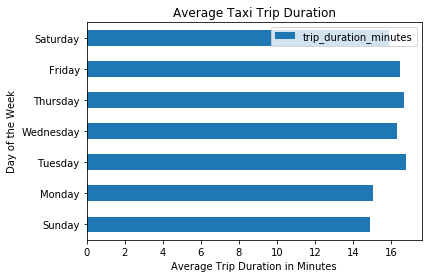

In [21]:
day_avg.plot(kind='barh')
plt.title('Average Taxi Trip Duration');
plt.xlabel('Average Trip Duration in Minutes');
plt.ylabel('Day of the Week')


#### Create Time Brackets labelled Morning_Rush and Evening_Rush
* Morning_Rush_Hour will be 7:00 AM to 9:00
* Evening_Rush_Hour will be 16:00  to 18:00

##### Convert the pickup datetime field to get "Pickup_hourofday"

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 14 columns):
Unnamed: 0               583458 non-null int64
id                       583458 non-null object
vendor_id                583458 non-null int64
pickup_datetime          583458 non-null datetime64[ns]
dropoff_datetime         583458 non-null datetime64[ns]
passenger_count          583458 non-null int64
pickup_longitude         583458 non-null float64
pickup_latitude          583458 non-null float64
dropoff_longitude        583458 non-null float64
dropoff_latitude         583458 non-null float64
store_and_fwd_flag       583458 non-null object
trip_duration            583458 non-null int64
trip_duration_minutes    583458 non-null float64
Pickup_dayofweek         583458 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(3)
memory usage: 62.3+ MB


In [23]:
df['pickup_hourofday'] = df.pickup_datetime.dt.hour
df['dropoff_hourofday']= df.dropoff_datetime.dt.hour

In [24]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_minutes,Pickup_dayofweek,pickup_hourofday,dropoff_hourofday
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,36.166667,Thursday,17,18
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,13.466667,Wednesday,10,10
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,63.116667,Wednesday,17,18
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,11.316667,Thursday,7,7
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,46.516667,Wednesday,17,18


In [25]:
def time_period(x):
   if x >= 7 and x <= 9:
       return 'morning_rush'
   elif x >= 10 and x <= 16:
       return 'day'
   elif x >= 16 and x <= 18:
       return 'evening_rush'
   else:
       return 'night'

In [26]:
df['time_period'] = df['pickup_hourofday'].apply(lambda x: time_period(x))

In [27]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_minutes,Pickup_dayofweek,pickup_hourofday,dropoff_hourofday,time_period
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,36.166667,Thursday,17,18,evening_rush
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,13.466667,Wednesday,10,10,day
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,63.116667,Wednesday,17,18,evening_rush
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,11.316667,Thursday,7,7,morning_rush
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,46.516667,Wednesday,17,18,evening_rush


In [28]:
time_period = df.groupby ('time_period')['trip_duration_minutes'].count()

Text(0,0.5,'Number of Pickups')

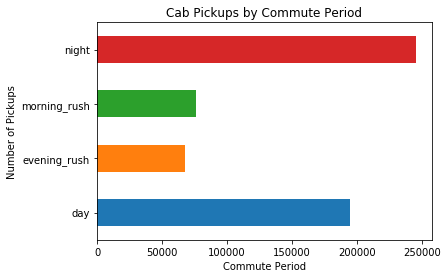

In [29]:
time_period.plot(kind='barh')
plt.title('Cab Pickups by Commute Period')
plt.xlabel('Commute Period')
plt.ylabel ('Number of Pickups')

In [30]:
weekday_pickup = df[(df.Pickup_dayofweek != 'Saturday') & (df.Pickup_dayofweek != 'Sunday')]

weekday_pickup.head() 

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_minutes,Pickup_dayofweek,pickup_hourofday,dropoff_hourofday,time_period
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,36.166667,Thursday,17,18,evening_rush
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,13.466667,Wednesday,10,10,day
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,63.116667,Wednesday,17,18,evening_rush
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,11.316667,Thursday,7,7,morning_rush
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,46.516667,Wednesday,17,18,evening_rush


In [31]:
weekday_time_count = weekday_pickup.groupby ('time_period')['trip_duration_minutes'].count()

Text(0,0.5,'Number of Pickups')

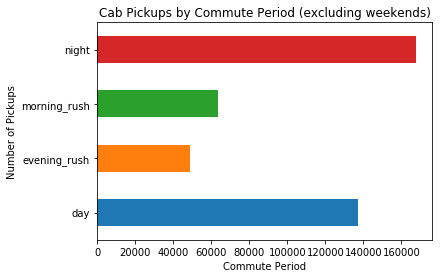

In [32]:
weekday_time_count.plot(kind='barh')
plt.title('Cab Pickups by Commute Period (excluding weekends)')
plt.xlabel('Commute Period')
plt.ylabel ('Number of Pickups')

## Create a Heat Map of pick-up locations and times

In [33]:
! conda install -y -c conda-forge folium 

Solving environment: done

# All requested packages already installed.



In [34]:
import folium

In [35]:
lat = df.pickup_latitude.mean()
long = df.pickup_longitude.mean()

#Create a map of the area
cab_map = folium.Map([lat, long])
cab_map


In [1]:
cab_map = folium.Map([lat, long])

for row in df.sample(500).index:
    lat = df['pickup_latitude'][row]
    long = df['pickup_longitude'][row]
    dur = df['trip_duration'][row]
    passengers = df['passenger_count'][row]
    details = 'Duration: {} Passengers:{}'.format(dur, passengers)
    marker = folium.Marker([lat, long], popup= details) 
    marker.add_to(cab_map)
cab_map

NameError: name 'folium' is not defined

In [39]:
#Making a heatmap for pickup locations - call it newyork_on_heatmap
#The redder a dot is, the longer the trip duration was from that pickup point

from folium import plugins
from folium.plugins import HeatMap


heat_df = df[['pickup_latitude', 'pickup_longitude', 'trip_duration_minutes']]


newyork_on_heatmap = folium.Map(location=[40.767937,-73.982155 ],tiles= "Stamen Terrain",
                   zoom_start = 13)

heat_df['Weight'] = heat_df['trip_duration_minutes']
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['pickup_latitude','pickup_longitude', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['pickup_latitude'],row['pickup_longitude']]
               for index, row in heat_df[heat_df['Weight'] == i].iterrows()]
                for i in range(0,6)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(newyork_on_heatmap)

# Display the map
newyork_on_heatmap

/Users/saupochan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/saupochan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Cleaning up the heatmap - Create a heatmap showing density of pickup
* Drop 4 decimals from the latitute and longitude using apply.df
* Use groupby apply to put the locations into buckets by block
* Find the average of pickups per block from pickup_location
## OK Guess we're not doing that

In [36]:
row_count = sum(1 for row in ('./Datasets/NYC_Cab_Duration.csv'))

In [37]:
print (row_count)

31


# Running Regression

In [38]:
#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = df[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' ]] #Only numeric features work

y = df['trip_duration']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
df['trip_duration'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n') 

R^2 model score: 0.0013507493768188938 



# Round the locations to bins
* Dropping the last two digits of the latitude and longitude

In [48]:
#rounding longitude and latitude for pickup and dropoff

df['pickup_lat_5'] = df['pickup_latitude'].round(5)
df['pickup_long_5'] = df['pickup_longitude'].round(5)
df['dropoff_lat_5'] = df['dropoff_latitude'].round(5)
df['dropoff_long_5'] = df['dropoff_longitude'].round(5)

In [49]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,Pickup_dayofweek,pickup_hourofday,dropoff_hourofday,time_period,pickup_longitude_round,pickup_latitude_round,pickup_lat_5,pickup_long_5,dropoff_lat_5,dropoff_long_5
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,...,Thursday,17,18,evening_rush,-73.99010,40.73284,40.73284,-73.99010,40.78288,-73.97324
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,...,Wednesday,10,10,day,-73.97569,40.75971,40.75971,-73.97569,40.75399,-73.98824
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,...,Wednesday,17,18,evening_rush,-73.78183,40.64477,40.64477,-73.78183,40.74715,-73.98996
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,...,Thursday,7,7,morning_rush,-73.95620,40.77871,40.77871,-73.95620,40.73973,-73.97646
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,...,Wednesday,17,18,evening_rush,-73.78951,40.64694,40.64694,-73.78951,40.80915,-73.95185
